Read Data from File to Pandas DataFrame

In [1]:
pip install pandas matplotlib seaborn xgboost scikit_learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Reading Input Dataset
import pandas as pd
data = pd.read_csv('BigMart_Sales.csv')

In [3]:
#lets print first 5 lines of dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing Missing Values with Mean and Mode.

In [6]:
data['Item_Weight'].mean()

12.857645184135976

In [7]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

/var/folders/mz/jcqfxsmd4y1f8kb__fgq14sc0000gn/T/ipykernel_12668/1823082424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x:x.mode()))

In [10]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [11]:
missing_values_loc = data['Outlet_Size'].isnull()

In [12]:
missing_values_loc

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [13]:


data.loc[missing_values_loc,'Outlet_Size'] = data.loc[missing_values_loc,'Outlet_Type' ].apply(lambda x:outlet_size_mode[x])

In [14]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:



data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Drawing Distribution (For Numeric Fields) and CountPlots(For Categorical Cols)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 600x600 with 0 Axes>

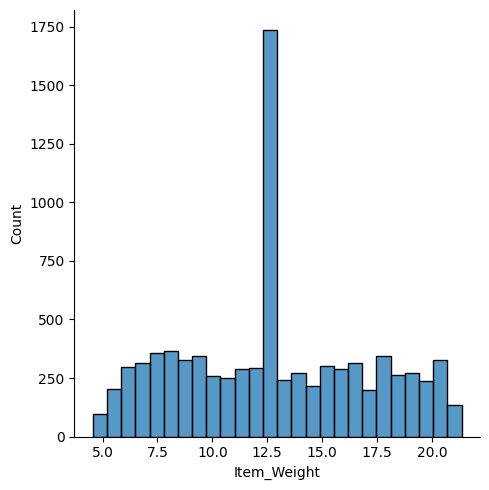

In [17]:

#Data Distribution for Item_Weight Col
plt.figure(figsize=(6,6))
sns.displot(data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

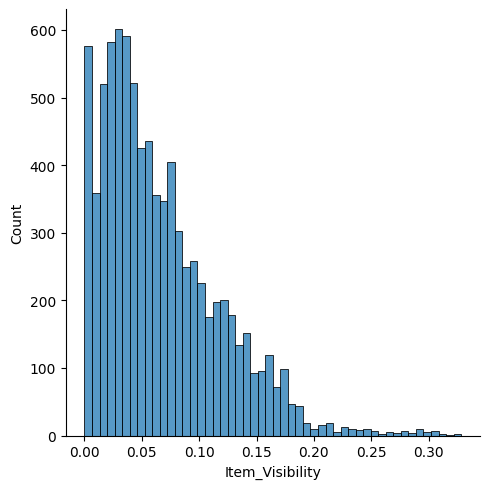

In [18]:
#Data Distribution for Item_Visibility Col
plt.figure(figsize=(6,6))
sns.displot(data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

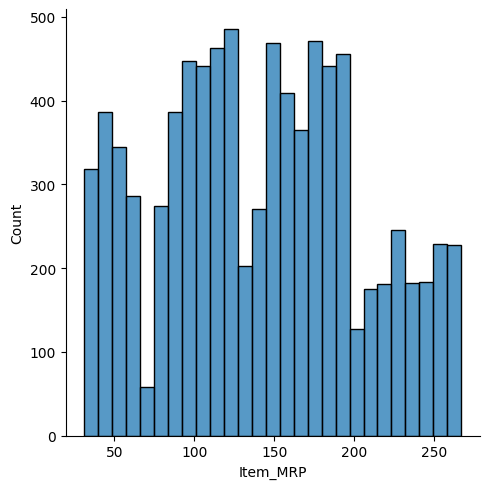

In [19]:
#Data Distribution for Item_MRP Col
plt.figure(figsize=(6,6))
sns.displot(data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

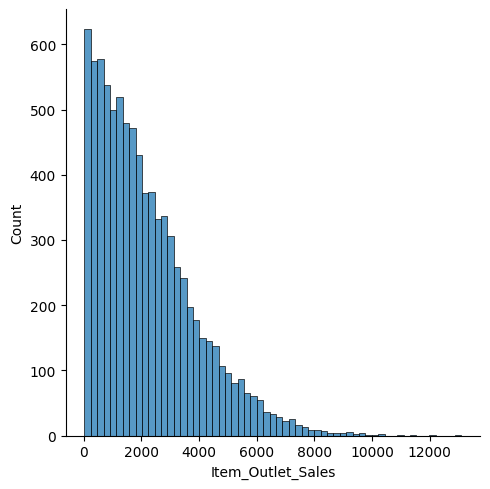

In [20]:
#Data Distribution for Item_Outlet_Sales Col
plt.figure(figsize=(6,6))
sns.displot(data['Item_Outlet_Sales'])
plt.show()

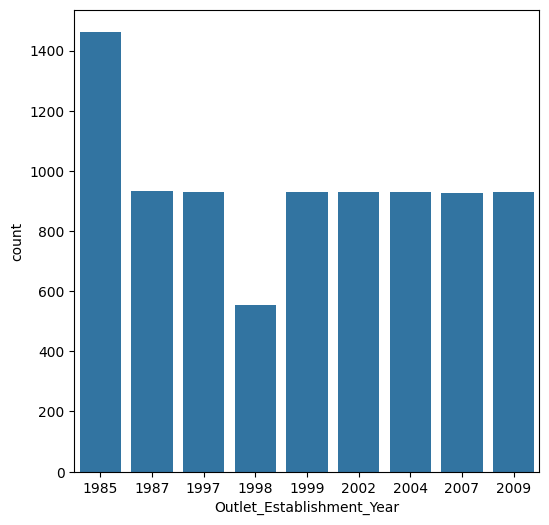

In [21]:
#CountPlot for Item_Outlet_Sales Col
plt.figure(figsize=(6,6))
sns.countplot(x = data['Outlet_Establishment_Year'], data=data)
plt.show()

In [22]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


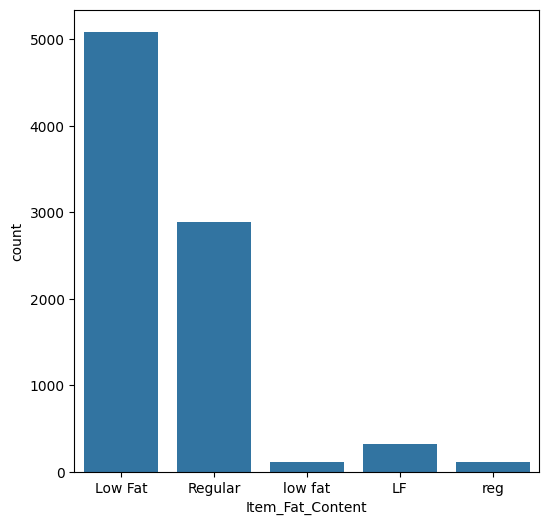

In [23]:
#CountPlot for Item_Outlet_Sales Col
plt.figure(figsize=(6,6))
sns.countplot(x = data['Item_Fat_Content'], data=data)
plt.show()

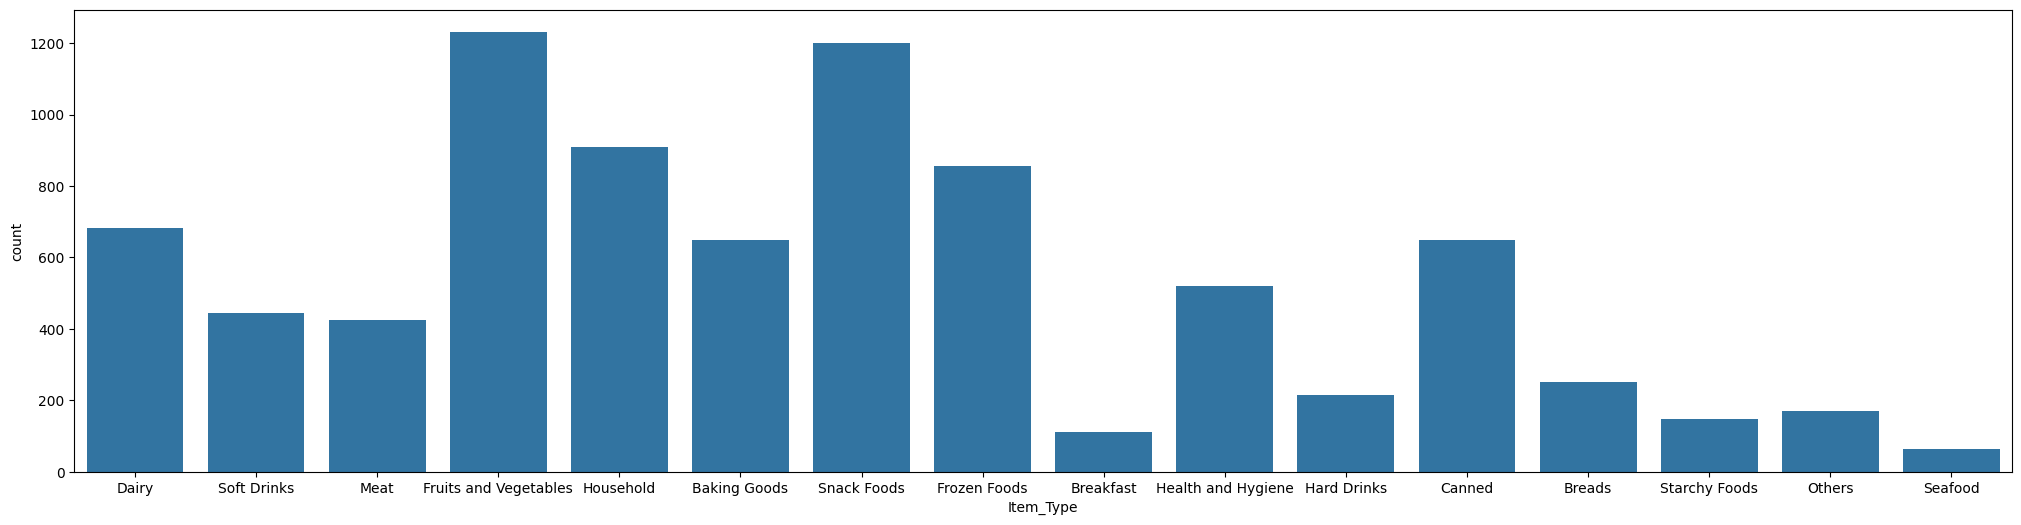

In [24]:
#CountPlot for Item_Outlet_Sales Col
plt.figure(figsize=(25,6))
sns.countplot(x = data['Item_Type'], data=data)
plt.show()

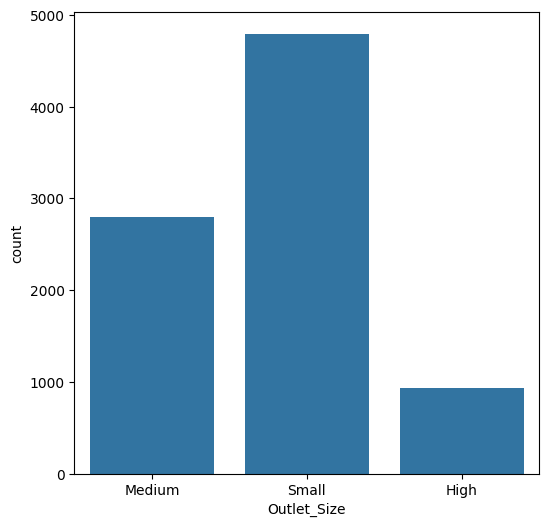

In [25]:
#CountPlot for Item_Outlet_Sales Col
plt.figure(figsize=(6,6))
sns.countplot(x = data['Outlet_Size'], data=data)
plt.show()

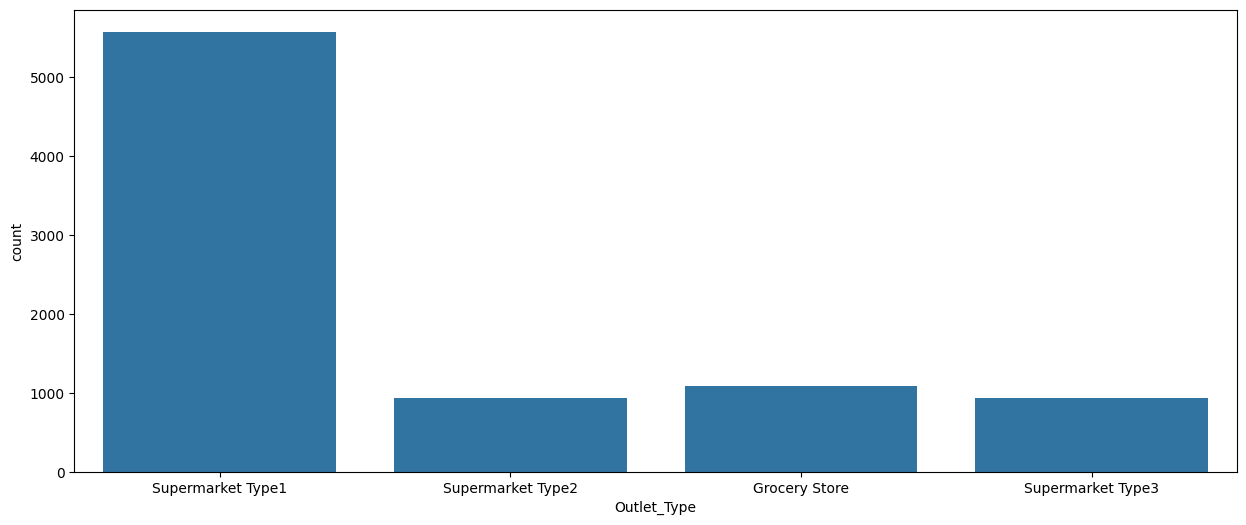

In [26]:

#CountPlot for Item_Outlet_Sales Col
plt.figure(figsize=(15,6))
sns.countplot(x = data['Outlet_Type'], data=data)
plt.show()

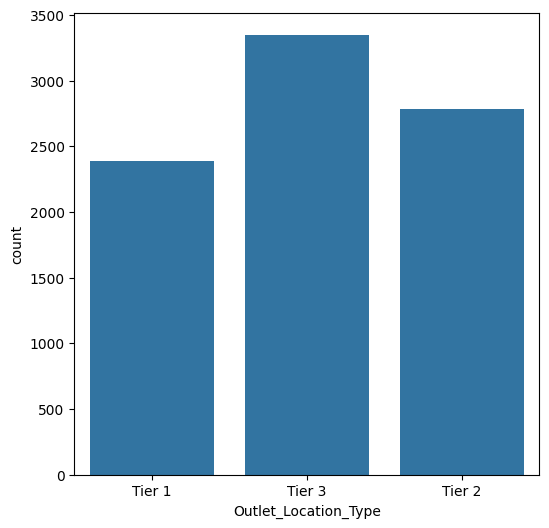

In [27]:
#CountPlot for Item_Outlet_Sales Col
plt.figure(figsize=(6,6))
sns.countplot(x = data['Outlet_Location_Type'], data=data)
plt.show()

In [28]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [29]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [30]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [31]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encoder = LabelEncoder()

In [34]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [35]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

In [36]:
x = data.drop(columns='Item_Outlet_Sales')
y = data['Item_Outlet_Sales']

In [37]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [38]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [41]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#Model Creation

In [42]:
print(y.shape, y_train.shape, y_test.shape)

(8523,) (6818,) (1705,)


In [43]:
from xgboost import XGBRegressor

In [44]:
model = XGBRegressor()

In [45]:
#training our model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
from sklearn.metrics import r2_score

In [47]:
predictions_train = model.predict(x_train)

In [48]:
r2_score(predictions_train, y_train)

0.8350389462654519

In [49]:
predictions_test = model.predict(x_test)

In [50]:
r2_score(predictions_test, y_test)

0.29352633970339315

In [51]:
X = data.drop('Item_Outlet_Sales', axis=1)  
y = data['Item_Outlet_Sales']


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

In [55]:
#training our model
lr_model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred_lr = lr_model.predict(X_test)

In [57]:
y_pred_lr = lr_model.predict(X_test)


In [58]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_lr)


print("Linear Regression R² Score:", r2)



Linear Regression R² Score: 0.520159740836994


In [59]:
from sklearn.ensemble import RandomForestRegressor


In [60]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [61]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))



Random Forest R² Score: 0.5577554720184912


In [62]:

from sklearn.tree import DecisionTreeRegressor


In [63]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [64]:
y_pred_dt = dt_model.predict(X_test)

from sklearn.metrics import r2_score

print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))



Decision Tree R² Score: 0.1761771943585041


In [65]:
# Example input values (edit these based on your dataset features)
input_data = {
    'Item_Identifier': 123, 
    'Item_Weight': 8.5,
    'Item_Visibility': 0.08,
    'Item_MRP': 200.0,
    'Item_Fat_Content': 1,  
    'Item_Type': 5,         
    'Outlet_Identifier': 3,
    'Outlet_Establishment_Year': 2006,
    'Outlet_Size': 1,       
    'Outlet_Location_Type': 2,
    'Outlet_Type': 0
}


input_df = pd.DataFrame([input_data])

# Arrange columns in correct order
expected_columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 
                    'Item_Type', 'Item_MRP', 'Outlet_Identifier', 
                    'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
input_df = input_df[expected_columns]

# Predict using trained model
prediction = model.predict(input_df)

print(f"Predicted Sales Output: {prediction[0]:.2f}")


Predicted Sales Output: 571.13


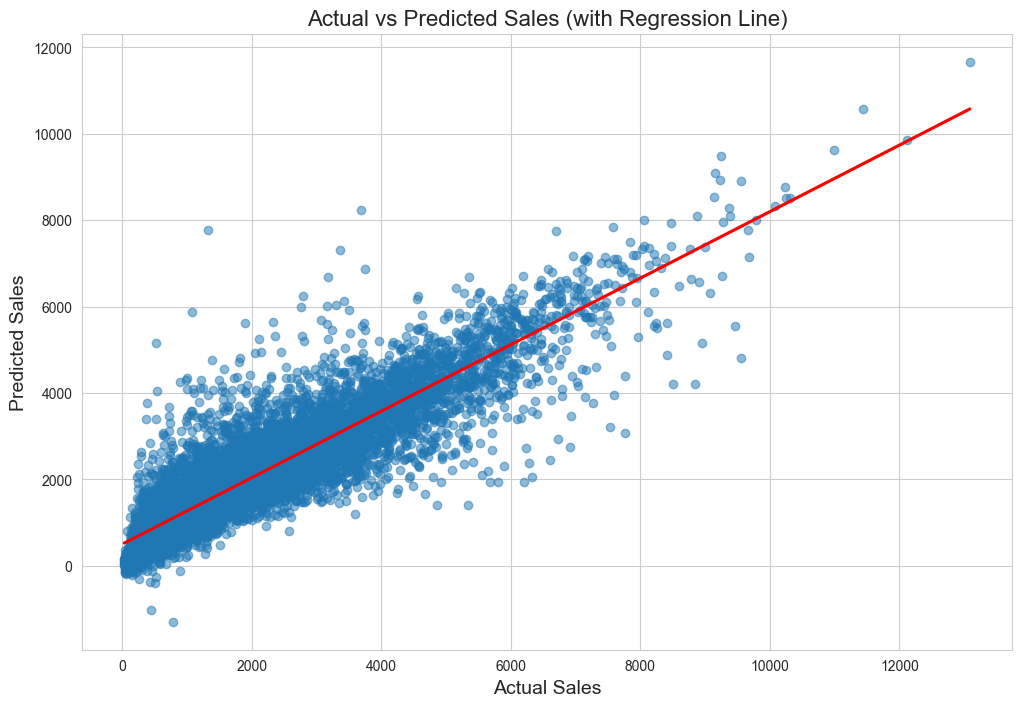

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# (Predict again if needed)
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
y_pred = model.predict(X)

# Create DataFrame
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Set plot style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Plot better suited graph
sns.regplot(x='Actual', y='Predicted', data=results_df,
            scatter_kws={'alpha':0.5}, # transparency of points
            line_kws={"color":"red"}, # regression line color
            ci=None) # Turn off confidence interval shading if you want

# Titles and labels
plt.title('Actual vs Predicted Sales (with Regression Line)', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True)
plt.show()
